In [1]:
from market_data import MarketData
import pandas as pd
from SV_model import SVModel
from visualization import *
import matplotlib.pyplot as plt

Calibrated SABR Parameters: alpha=1.0000, beta=0.8021, rho=-0.9900, nu=1.5000
120.0 202.5


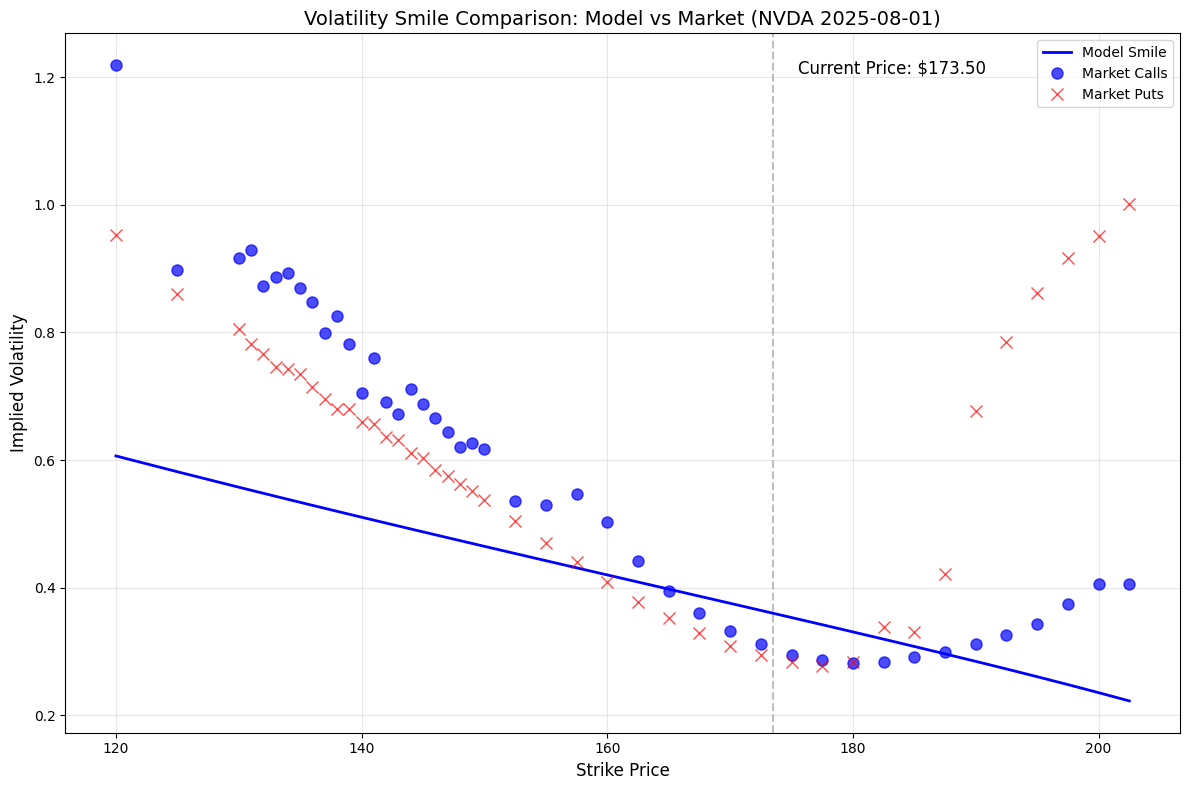

155.0 202.5


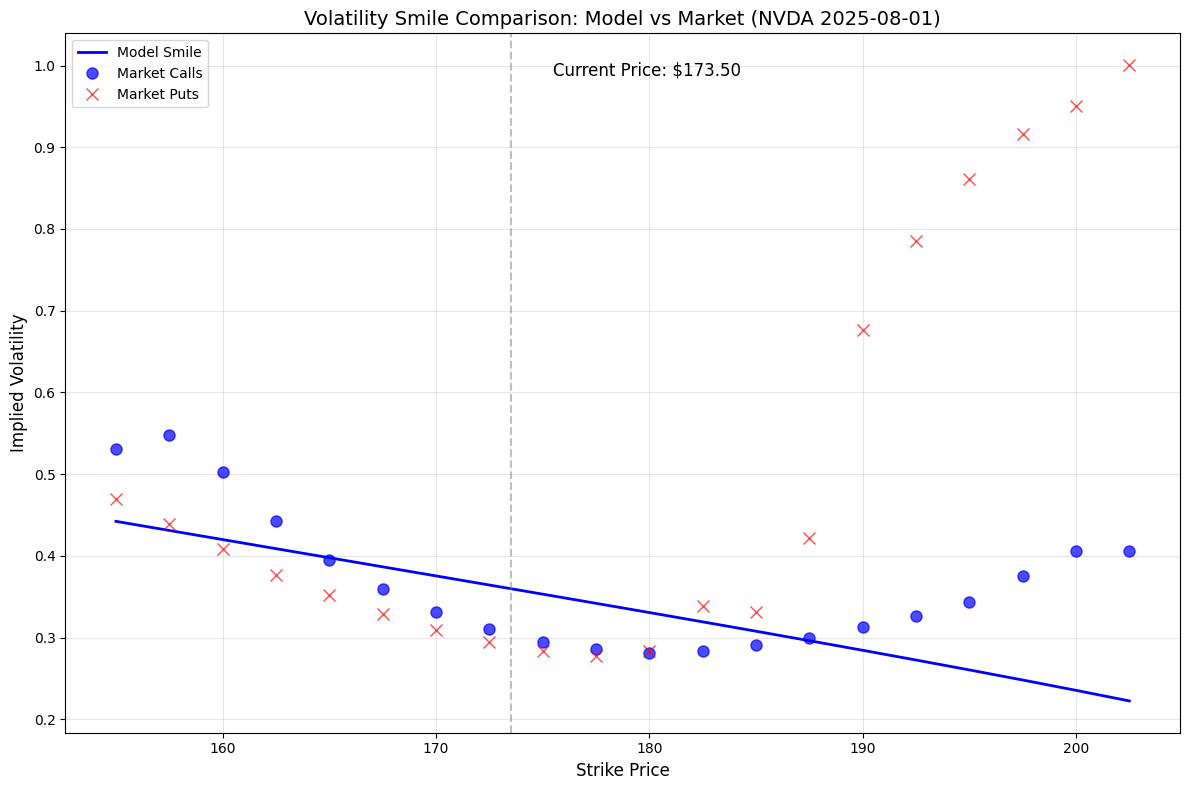

In [2]:
ticker = "NVDA"
market_data = MarketData(ticker)
options = pd.read_csv(f'market_data_exports/{ticker}-CALLS.csv')
expiration_date = options['expirationDate'][0]
nvda = SVModel(ticker, expiration_date)

nvda_plot_500 = plot_volatility_smiles(ticker, expiration_date, f'model_output/{ticker}-SABR-VOLSMILE-{expiration_date}.csv', 500)
nvda_plot_1000  = plot_volatility_smiles(ticker, expiration_date, f'model_output/{ticker}-SABR-VOLSMILE-{expiration_date}.csv', 1000)

Calibrated SABR Parameters: alpha=1.0000, beta=0.8492, rho=-0.5733, nu=1.5000
190.0 250.0


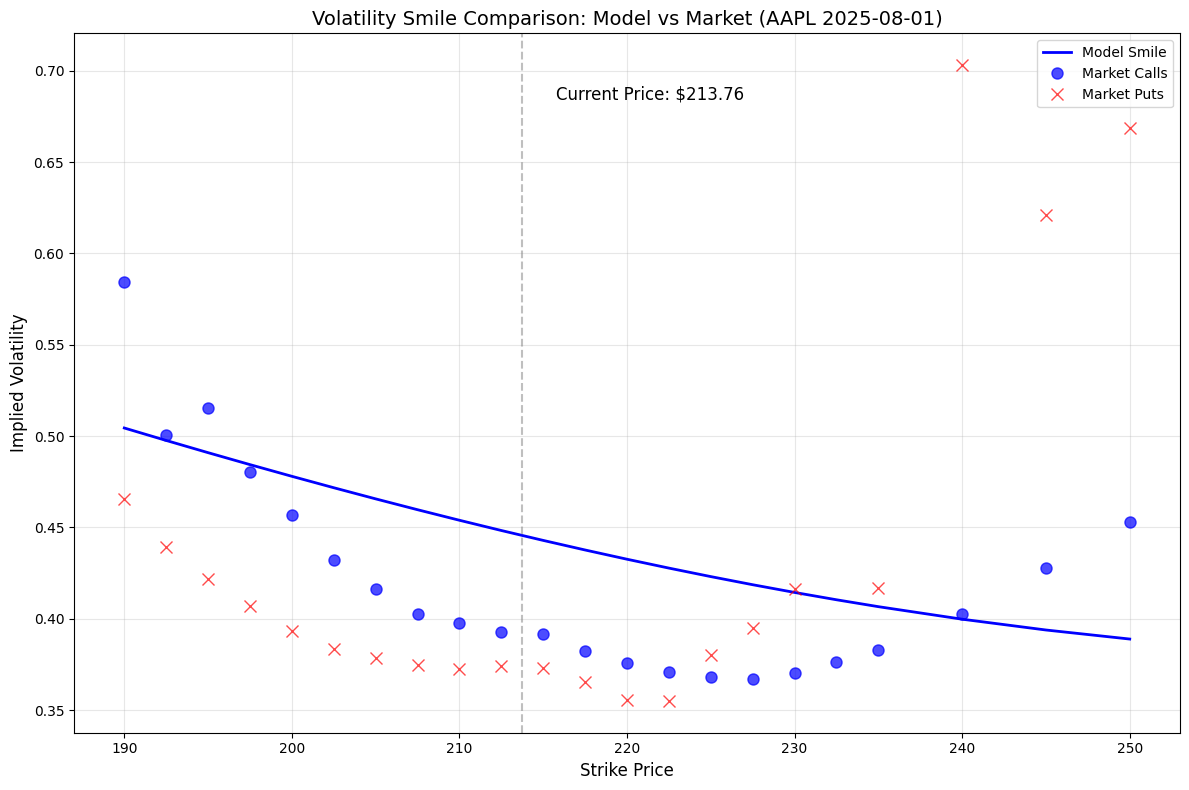

190.0 250.0


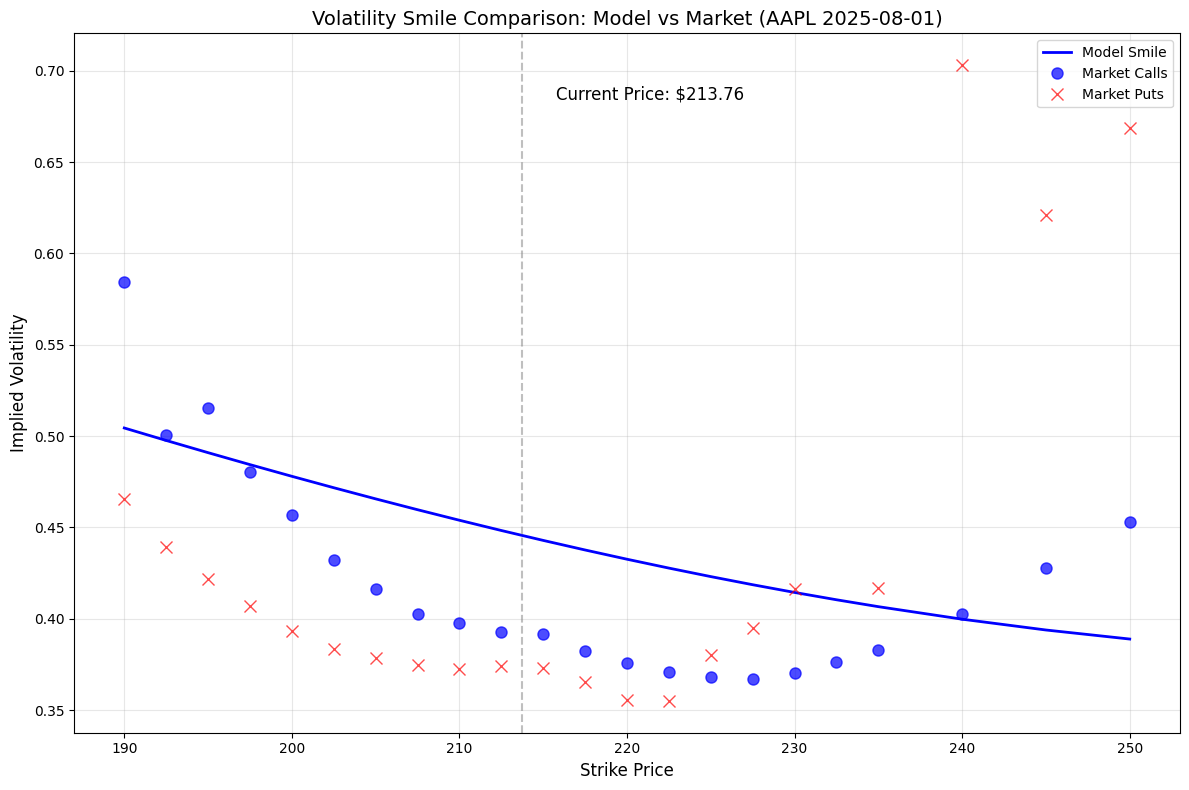

In [3]:
ticker = "AAPL"
market_data = MarketData(ticker)
options = pd.read_csv(f'market_data_exports/{ticker}-CALLS.csv')
expiration_date = options['expirationDate'][0]
aapl = SVModel(ticker, expiration_date)

aapl_plot_500 = plot_volatility_smiles(ticker, expiration_date, f'model_output/{ticker}-SABR-VOLSMILE-{expiration_date}.csv', 500)
aapl_plot_1000 = plot_volatility_smiles(ticker, expiration_date, f'model_output/{ticker}-SABR-VOLSMILE-{expiration_date}.csv', 1000)